<a href="https://colab.research.google.com/github/Shamiul-693/-Sherlock-Holmes-dataset./blob/main/Sherlock_Holmes_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load dataset

In [3]:
import os

def load_dataset(folder_path):
    stories = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                stories.append(file.read())
    return stories

# Your extraction path
folder_path = "/content/drive/MyDrive/ Sherlock /sherlock"
stories = load_dataset(folder_path)

# Check the number of stories loaded
print(f"Loaded {len(stories)} stories.")


Loaded 67 stories.


#Visualization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


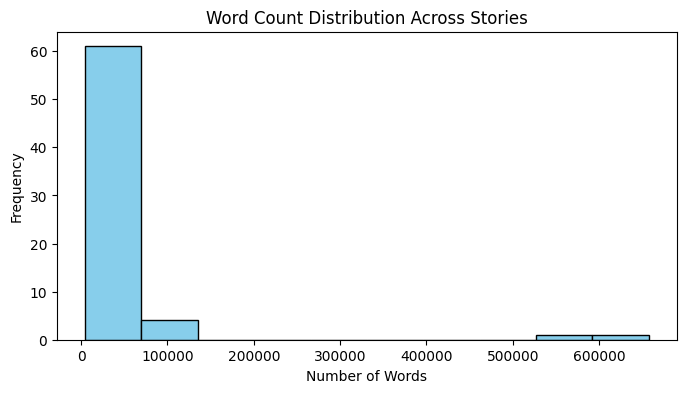

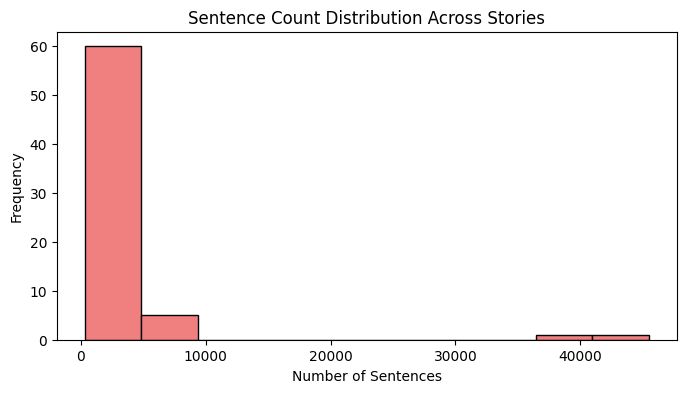

Average number of words per story: 35047.40
Average number of sentences per story: 2417.19


In [17]:
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

# Ensure NLTK resources are available
nltk.download('punkt')

# Analyze each story
story_lengths = [len(story.split()) for story in stories]  # Word count per story
sentence_counts = [len(sent_tokenize(story)) for story in stories]  # Sentence count per story

# Visualize the word count distribution
plt.figure(figsize=(8, 4))
plt.hist(story_lengths, bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count Distribution Across Stories')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize the sentence count distribution
plt.figure(figsize=(8, 4))
plt.hist(sentence_counts, bins=10, color='lightcoral', edgecolor='black')
plt.title('Sentence Count Distribution Across Stories')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

# Average word and sentence counts
avg_words = sum(story_lengths) / len(stories)
avg_sentences = sum(sentence_counts) / len(stories)

print(f"Average number of words per story: {avg_words:.2f}")
print(f"Average number of sentences per story: {avg_sentences:.2f}")


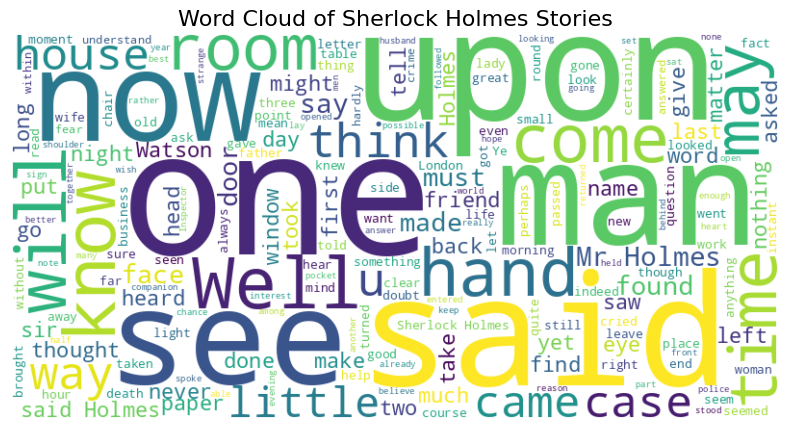

In [15]:
from wordcloud import WordCloud

# Combine all stories into one text
all_text = " ".join(stories)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sherlock Holmes Stories', fontsize=16)
plt.show()


#Task 1:
Clean the Sherlock Holmes dataset to handle common text preprocessing challenges,

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


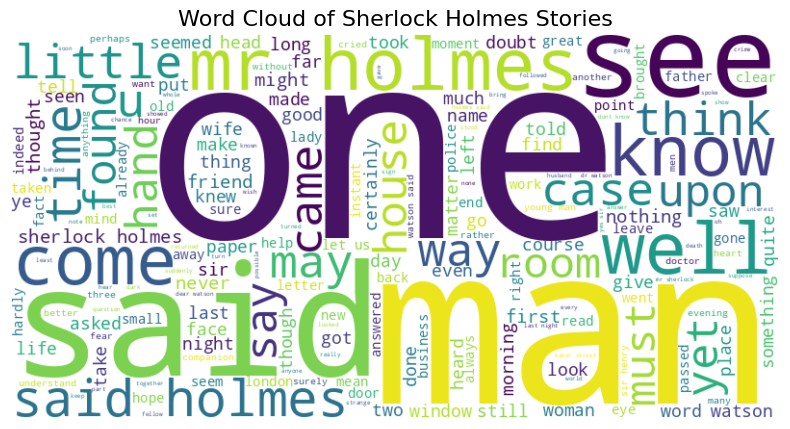

In [26]:


# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
     # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Join back into string
    text = " ".join(tokens)
    return text


cleaned_stories = [clean_text(story) for story in stories]

# Analyze each story
story_lengths = [len(story.split()) for story in cleaned_stories]  # Word count per story
sentence_counts = [len(sent_tokenize(story)) for story in cleaned_stories]  # Sentence count per story


# ... (rest of your visualization and analysis code) ...

# Combine all stories into one text
all_text = " ".join(cleaned_stories)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sherlock Holmes Stories', fontsize=16)
plt.show()

#Verifying the Cleaning

In [27]:
# Word count distribution after cleaning
word_counts = [len(story.split()) for story in cleaned_stories]
print(f"Average words per story: {sum(word_counts)/len(word_counts):.2f}")

# Print a sample of cleaned text
print(cleaned_stories[0][:500])


Average words per story: 15882.01
adventure beryl coronet arthur conan doyle holmes said stood one morning bowwindow looking street madman coming along seems rather sad relatives allow come alone friend rose lazily armchair stood hands pockets dressinggown looking shoulder bright crisp february morning snow day still lay deep upon ground shimmering brightly wintry sun centre baker street ploughed brown crumbly band traffic either side heapedup edges footpaths still lay white fell grey pavement cleaned scraped still dangerously s


#Task 2:
• Implement a Seq2Seq model using an Encoder-Decoder LSTM architecture for
summarizing entire Sherlock Holmes stories into short summaries.

In [37]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from sklearn.model_selection import train_test_split

# Sample dataset - add more stories and summaries for better training
stories = [
    "adventure beryl coronet arthur conan doyle holmes said stood one morning bowwindow looking street madman coming along seems rather sad relatives allow come alone friend rose lazily armchair stood hands pockets dressinggown looking shoulder bright crisp february morning snow day still lay deep upon ground shimmering brightly wintry sun centre baker street ploughed brown crumbly band traffic either side heapedup edges footpaths still lay white fell grey pavement cleaned scraped still dangerously ",
    "the adventure of the speckled band is one of the 56 sherlock holmes short stories written by sir arthur conan doyle it is the third of the twelve stories collected as the adventures of sherlock holmes and is one of doyles favourite stories as he placed it first when asked to name his twelve favourite sherlock holmes stories in 1927 it was originally published in the strand magazine in february 1892 with illustrations by sidney paget",
    # ... add more stories here ...
]
summaries = [
    "beryl coronet arthur conan doyle holmes and rose stood in a snowy february morning observing the street with a sad saddened look the scene was filled with traffic and dangerous conditions",
    "the adventure of the speckled band a favorite of sir arthur conan doyle is one of the 56 sherlock holmes stories and is wellknown for its captivating plot",
    # ... add more summaries here ...
]

# ... (rest of your code remains the same) ...

# Preprocessing the data
def preprocess_texts(texts, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

# Tokenize stories and summaries
story_tokenizer = Tokenizer()
summary_tokenizer = Tokenizer()

story_tokenizer.fit_on_texts(stories)
summary_tokenizer.fit_on_texts(summaries)

max_story_length = 200  # Max words in stories
max_summary_length = 20  # Max words in summaries

vocab_size_story = len(story_tokenizer.word_index) + 1
vocab_size_summary = len(summary_tokenizer.word_index) + 1

# Convert texts to sequences and pad them
encoder_input_data = preprocess_texts(stories, story_tokenizer, max_story_length)
decoder_input_data = preprocess_texts(summaries, summary_tokenizer, max_summary_length)

# Shift summaries by one for decoder target data
decoder_target_data = np.zeros_like(decoder_input_data)
decoder_target_data[:, :-1] = decoder_input_data[:, 1:]

# Split into training and validation sets
X_train, X_val, y_train, y_val, dec_in_train, dec_in_val = train_test_split(
    encoder_input_data, decoder_target_data, decoder_input_data, test_size=0.2, random_state=42
)

# Seq2Seq model
latent_dim = 256

# Encoder
encoder_inputs = Input(shape=(max_story_length,))
enc_emb = Embedding(vocab_size_story, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_summary_length,))
dec_emb = Embedding(vocab_size_summary, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_summary, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

# Train the model
history = model.fit(
    [X_train, dec_in_train], y_train,
    epochs=10,
    batch_size=32,
    validation_data=([X_val, dec_in_val], y_val)
)

# Save the model
model.save("seq2seq_summarization.h5")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 200, 256)       │         27,136 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 20, 256)        │         11,264 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, 256), (None,   │        525,312 │ embedding_4[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, 20, 256),      │        525,312 │ embedding_5[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_6[0][1],          │
│                           │ 256)]                  │                │ lstm_6[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 20, 44)         │         11,308 │ lstm_7[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,100,332 (4.20 MB)

 Trainable params: 1,100,332 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 3.7834 - val_loss: 3.7907
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step - loss: 3.7441 - val_loss: 3.7989
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 3.6932 - val_loss: 3.8200
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step - loss: 3.5959 - val_loss: 3.9074
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - loss: 3.3405 - val_loss: 4.1869
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - loss: 2.9731 - val_loss: 4.6747
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - loss: 2.7653 - val_loss: 5.0321
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step - loss: 2.5955 - val_loss: 5.2365
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step - loss: 2.3997 - val_loss: 5.4020
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - loss: 2.2433 - val_loss: 5.5979


#Train the model to produce summaries of around 50-100 words.

In [46]:
def decode_sequence(input_seq):
    # Encode the input story
    states_value = encoder_model.predict(input_seq)

    # Start with the <start> token or a suitable replacement if not present
    target_seq = np.zeros((1, 1))

    # Check if '<start>' is in word_index, if not, use a common word like 'the' or the first word
    start_token = summary_tokenizer.word_index.get('<start>', summary_tokenizer.word_index.get('the', 1))
    target_seq[0, 0] = start_token  # Using 'the' or the first word's index as a fallback

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # Handle the case where sampled_token_index is not in index_word
        sampled_token = summary_tokenizer.index_word.get(sampled_token_index, None)  # Returns None if not found

        # Exit condition: either hit max length or find stop token or unknown token.
        if sampled_token is None or sampled_token == '<end>' or len(decoded_sentence.split()) >= (max_summary_length - 1):  # Adjust max_summary_length as needed
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_token

            # Update the target sequence (of length 1).
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = sampled_token_index

            # Update states
            states_value = [h, c]

    return decoded_sentence

# Use the trained encoder-decoder models to summarize
new_story_seq = preprocess_texts(["A new Sherlock Holmes story..."], story_tokenizer, max_story_length)
summary = decode_sequence(new_story_seq)
print("Summary:", summary)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Summary:  february february observing observing the the the the with with with with and and and and and and and


#Evaluate the model on both using suitable score metrics

In [49]:
!pip install rouge

In [50]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

# Load the trained model (if not already loaded)
from tensorflow.keras.models import load_model

model = load_model("seq2seq_summarization.h5")

# Reuse preprocess_texts, tokenizer, etc., from earlier steps

# Function to decode generated summaries
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = summary_tokenizer.word_index.get('<start>', 0)
    stop_condition = False
    decoded_sentence = ""

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = summary_tokenizer.index_word.get(sampled_token_index, "")
        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_summary_length:
            stop_condition = True
        else:
            decoded_sentence += " " + sampled_word

        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()

# Evaluate the model
rouge = Rouge()
smoothie = SmoothingFunction().method4

# Collect scores
bleu_scores = []
rouge_scores = []

for i, story in enumerate(X_val):
    # Preprocess and generate summary
    input_seq = np.expand_dims(story, axis=0)
    predicted_summary = decode_sequence(input_seq)

    # Get the reference summary
    reference_summary = " ".join([summary_tokenizer.index_word.get(idx, "") for idx in y_val[i] if idx > 0])

    # Calculate BLEU score
    bleu = sentence_bleu([reference_summary.split()], predicted_summary.split(), smoothing_function=smoothie)
    bleu_scores.append(bleu)

    # Calculate ROUGE scores
    rouge_score = rouge.get_scores(predicted_summary, reference_summary, avg=True)
    rouge_scores.append(rouge_score)

# Average BLEU and ROUGE scores
avg_bleu = np.mean(bleu_scores)
avg_rouge = {
    "rouge-1": np.mean([score["rouge-1"]["f"] for score in rouge_scores]),
    "rouge-2": np.mean([score["rouge-2"]["f"] for score in rouge_scores]),
    "rouge-l": np.mean([score["rouge-l"]["f"] for score in rouge_scores]),
}

print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE Scores: {avg_rouge}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━

#Task 3:
• Create vector embeddings for individual paragraphs from the Sherlock Holmes
dataset using pre-trained models like all-MiniLM-L6-v2.

In [51]:
from sentence_transformers import SentenceTransformer
import os

# Load pre-trained model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Load Sherlock Holmes dataset
def load_dataset(folder_path):
    paragraphs = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                # Split stories into paragraphs
                paragraphs.extend(text.split("\n\n"))  # Assuming paragraphs are separated by double newlines
    return [para.strip() for para in paragraphs if para.strip()]

# Your dataset path
folder_path = "/content/drive/MyDrive/ Sherlock /sherlock"
paragraphs = load_dataset(folder_path)

print(f"Loaded {len(paragraphs)} paragraphs.")

# Generate embeddings for all paragraphs
embeddings = model.encode(paragraphs, show_progress_bar=True)

print(f"Generated embeddings for {len(embeddings)} paragraphs.")

# Save embeddings and paragraphs for later use
import numpy as np

np.save("paragraph_embeddings.npy", embeddings)
with open("paragraphs.txt", "w", encoding="utf-8") as file:
    for para in paragraphs:
        file.write(para + "\n")


Loaded 55705 paragraphs.


Batches:   0%|          | 0/1741 [00:00<?, ?it/s]

Generated embeddings for 55705 paragraphs.


#Store Embeddings in ChromaDB

In [ ]:
from chromadb.config import Settings
import chromadb

# Initialize ChromaDB
client = chromadb.PersistentClient(path="chromadb_store")
collection = client.get_or_create_collection(name="sherlock_paragraphs")

# Add paragraphs and embeddings to the collection
for idx, (paragraph, embedding) in enumerate(zip(paragraphs, embeddings)):
    collection.add(
        documents=[paragraph],
        metadatas={"id": idx},
        ids=[str(idx)],
        embeddings=[embedding.tolist()]
    )

print("Embeddings stored in ChromaDB.")
